In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#讀入 Tensorflow
import tensorflow as tf

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

## 讀入MNSIT數據集

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 欣賞數據集內容

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [10]:
n = 8888

In [11]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  26, 192, 254, 254, 254, 254, 254,
        174,  80,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_train[n]

3

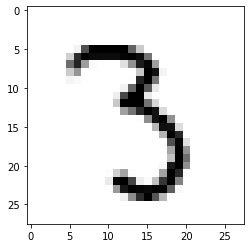

In [13]:
plt.imshow(x_train[n], cmap='Greys') #cmap 設定顏色主題

## 資料整理

In [14]:
np.array([3, 78, 95, 99])/100 #用np.array可以一次對全部數值做運算

array([0.03, 0.78, 0.95, 0.99])

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train = x_train.reshape(60000, 784)

In [18]:
x_test = x_test.reshape(10000,784)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train = to_categorical(y_train, 10) #做成one hat encoding

In [21]:
y_test = to_categorical(y_test, 10)

In [22]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 打造神經網路

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [24]:
model = Sequential()

In [25]:
model.add(Dense(87, input_dim=784, activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
model.add(Dense(87, activation='relu'))

In [33]:
model.add(Dense(10, activation='softmax')) 

## 組裝我們的神經網路

In [34]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 101)               8888      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1020      
Total params: 85,859
Trainable params: 85,859
Non-trainable params: 0
_________________________________________________________________


In [36]:
784*87 + 87 #還有bias要調整

68295

In [37]:
87*87 +87

7656

## 訓練神經網路

In [38]:
model.fit(x_train, y_train, batch_size=100, epochs=20) #每100筆做訓練，每次都調整參數，做20次

Epoch 1/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0900 - acc: 0.1045
Epoch 2/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0900 - acc: 0.1044
Epoch 3/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0900 - acc: 0.1238
Epoch 4/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0900 - acc: 0.1301
Epoch 5/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0900 - acc: 0.1124
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0900 - acc: 0.1124
Epoch 7/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0900 - acc: 0.1124
Epoch 8/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0900 - acc: 0.1124
Epoch 9/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0900 - acc: 0.1124
Epoch 10/20
60000/60000 [==============================] - 2s 29us/sample - loss: 

## 訓練成果

In [39]:
result = model.predict_classes(x_test)

神經網路預測是: 1


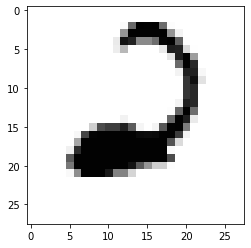

In [40]:
n = 9487

print('神經網路預測是:', result[n])
plt.imshow(x_test[n].reshape(28,28), cmap="Greys")

In [41]:
def show_predict(n):
    print('神經網路預測是:', result[n])
    plt.imshow(x_test[n].reshape(28,28), cmap="Greys")

神經網路預測是: 1


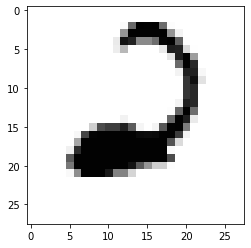

In [42]:
show_predict(n)

In [43]:
def run():
    cur = 0
    for i in range(10000):
        if result[i] == y_test[i]:
            cur = cur + 1
    print(cur/len(x_test))

In [44]:
run()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [45]:
len(x_test)

10000

In [46]:
result[7]

1

In [47]:
y_test[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)